<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical


In [ ]:
# Define label names
label_names = ['hoa mai','hoa sung','hoa sen']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load and preprocess the data
X = []
y = []

data_dir = '/content/drive/MyDrive/datamachinelearning/flowers/trainhoa'
for label in label_names:
    label_dir = os.path.join(data_dir, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = load_img(img_path, target_size=(100, 100))
        img = img_to_array(img)
        X.append(img)
        y.append(label_names.index(label))

X = np.array(X) / 255.0
y = to_categorical(np.array(y))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

KNeighborsClassifier()

In [ ]:
# Evaluate the classifier on the test set
y_pred = knn.predict(X_test.reshape(X_test.shape[0], -1))
acc = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print('Accuracy:', acc)

Accuracy: 0.9886363636363636


Prediction: hoa sen


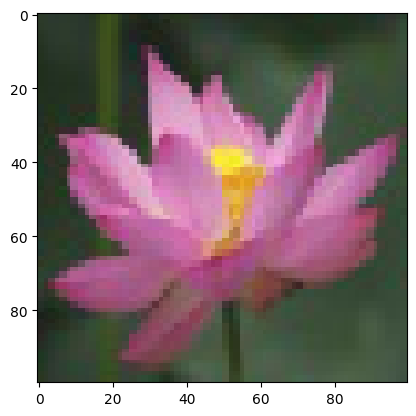

In [ ]:
# Make a prediction on a new image
img_path = '/content/drive/MyDrive/datamachinelearning/flowers/testhoa/4.jpg'
img = load_img(img_path, target_size=(100, 100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, -1)
img = img / 255.0
y_pred = knn.predict(img)
print('Prediction:', label_names[y_pred[0]])

Prediction: hoa mai


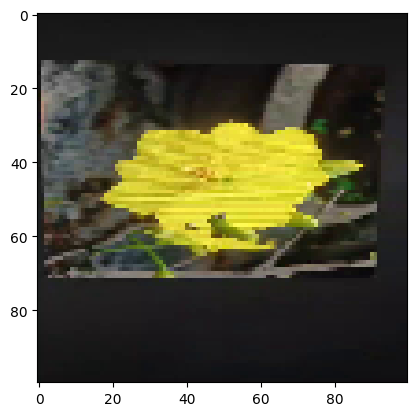

In [ ]:
img_path = '/content/drive/MyDrive/datamachinelearning/flowers/testhoa/2.jpg'
img = load_img(img_path, target_size=(100, 100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, -1)
img = img / 255.0
y_pred = knn.predict(img)
print('Prediction:', label_names[y_pred[0]])

Prediction: hoa sung


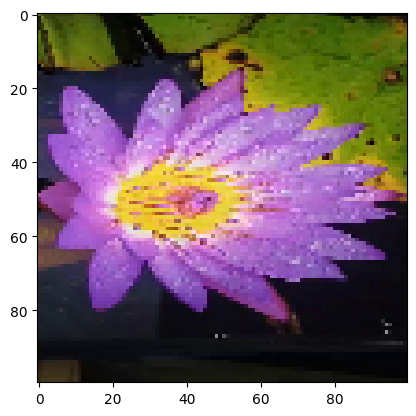

In [ ]:
img_path = '/content/drive/MyDrive/datamachinelearning/flowers/testhoa/3.jpg'
img = load_img(img_path, target_size=(100, 100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, -1)
img = img / 255.0
y_pred = knn.predict(img)
print('Prediction:', label_names[y_pred[0]])